In [5]:
from Utils.visualization import *

Precision:0.9250, Recall:0.8810, F1-score:0.9024, Accuraci:0.8788, AUC:0.9210


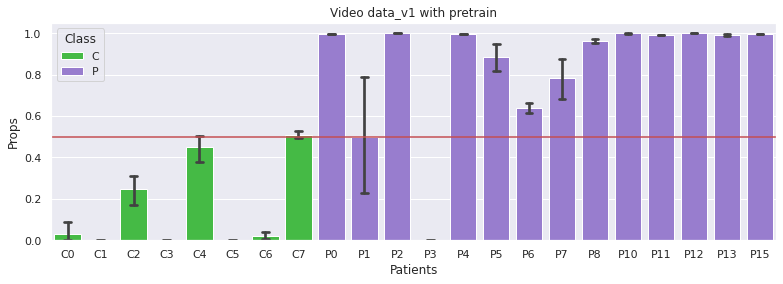

In [6]:
data_path = '/home/brayan/audiovisualpk/Results/Note:LOO_data_v1-Lr:0.001-Epoch:10-Exercise:Words.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Video data_v1 with pretrain')

Precision:0.6454, Recall:0.6000, F1-score:0.6219, Accuraci:0.5440, AUC:0.6396


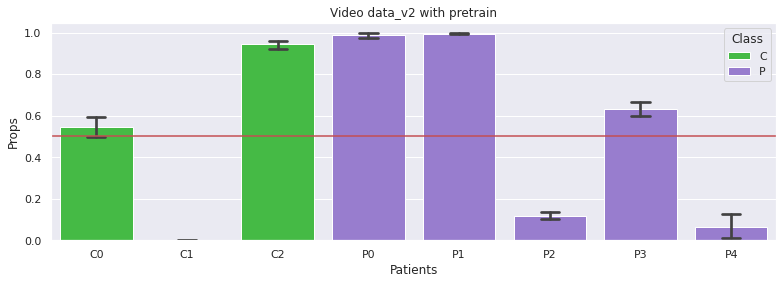

In [7]:
data_path = 'Results/Note:LOO_data_v2-Lr:0.001-Epoch:10-Exercise:Words.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Video data_v2 with pretrain')